In [1]:
# Initialize
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Lab 4: Putting it all together in a mini project

For this lab, **you can choose to work alone of in a group of up to four students**. You are in charge of how you want to work and who you want to work with. Maybe you really want to go through all the steps of the ML process yourself or maybe you want to practice your collaboration skills, it is up to you! Just remember to indicate who your group members are (if any) when you submit on Gradescope. If you choose to work in a group, you only need to use one GitHub repo (you can create one on github.ubc.ca and set the visibility to "public").

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## Submission instructions
rubric={mechanics}

<p>You receive marks for submitting your lab correctly, please follow these instructions:</p>

<ul>
  <li><a href="https://ubc-mds.github.io/resources_pages/general_lab_instructions/">
      Follow the general lab instructions.</a></li>
  <li><a href="https://github.com/UBC-MDS/public/tree/master/rubric">
      Click here to view a description of the rubrics used to grade the questions</a></li>
  <li>Make at least three commits.</li>
  <li>Push your <code>.ipynb</code> file to your GitHub repository for this lab and upload it to Gradescope.</li>
    <ul>
      <li>Before submitting, make sure you restart the kernel and rerun all cells.</li>
    </ul>
  <li>Also upload a <code>.pdf</code> export of the notebook to facilitate grading of manual questions (preferably WebPDF, you can select two files when uploading to gradescope)</li>
  <li>Don't change any variable names that are given to you, don't move cells around, and don't include any code to install packages in the notebook.</li>
  <li>The data you download for this lab <b>SHOULD NOT BE PUSHED TO YOUR REPOSITORY</b> (there is also a <code>.gitignore</code> in the repo to prevent this).</li>
  <li>Include a clickable link to your GitHub repo for the lab just below this cell
    <ul>
      <li>It should look something like this https://github.ubc.ca/MDS-2020-21/DSCI_531_labX_yourcwl.</li>
    </ul>
  </li>
</ul>
</div>

_Points:_ 2

https://github.ubc.ca/MDS-2023-24/Credit-Sense_predictive-analytics-for-credit-default

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this lab you will be working on an open-ended mini-project, where you will put all the different things you have learned so far in 571 and 573 together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. Since this mini-project is open-ended there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you instead do a bunch of sane things and you have clearly motivated your choices, but still get lower model performance than your friend, don't sweat it.


#### A final note
Finally, the style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "several hours" but not "many hours" is a good guideline for a high quality submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and we hope you enjoy it as well. 

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
rubric={reasoning}

In this mini project, you will pick one of the following problems: 

1. A classification problem of predicting whether a credit card client will default or not. For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

OR 

2. A regression problem of predicting `reviews_per_month`, as a proxy for the popularity of the listing with [New York City Airbnb listings from 2019 dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 
3. Carry out any preliminary preprocessing, if needed (e.g., changing feature names, handling of NaN values etc.)
    
</div>

_Points:_ 3

- target: class imbalance -> use evaluation metrics other than accuracy, e.g f1 score, precision, call...<br>
- Some of the feature names do not make sense -> changing feature names<br>
- Some data types are misleading for training models -> convert to the suitable data type

In [2]:
import pandas as pd

df = pd.read_csv("data/UCI_Credit_Card.csv")
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


As we can see in the Kaggle dataset description:
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
  
...

- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

We want to Rename some of the columns to make them meaningful, and like this:
```
new_column_names = {
    'PAY_0': 'REPAY_MON_9',
    'PAY_2': 'REPAY_MON_8',
    'PAY_3': 'REPAY_MON_7',
    'PAY_4': 'REPAY_MON_6',
    'PAY_5': 'REPAY_MON_5',
    'PAY_6': 'REPAY_MON_4',
    'BILL_AMT1': 'BILL_AMT_MON_9',
    'BILL_AMT2': 'BILL_AMT_MON_8',
    'BILL_AMT3': 'BILL_AMT_MON_7',
    'BILL_AMT4': 'BILL_AMT_MON_6',
    'BILL_AMT5': 'BILL_AMT_MON_5',
    'BILL_AMT6': 'BILL_AMT_MON_4'
}
```

In [3]:
months = ['9', '8', '7', '6', '5', '4'] 
repay_cols = {f'PAY_{i+2}': f'REPAY_MON_{months[i+1]}' for i in range(len(months)-1)}
repay_cols['PAY_0'] = 'REPAY_MON_9'
bill_columns = {f'BILL_AMT{i+1}': f'BILL_AMT_MON_{months[i]}' for i in range(len(months))}

# Combine both dictionaries into one
new_column_names = {**repay_cols, **bill_columns}
df.rename(columns=new_column_names, inplace=True)
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')
df

There are 30000 rows and 25 columns


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,REPAY_MON_9,REPAY_MON_8,REPAY_MON_7,REPAY_MON_6,...,BILL_AMT_MON_6,BILL_AMT_MON_5,BILL_AMT_MON_4,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 2. Data splitting <a name="2"></a>
rubric={reasoning}

**Your tasks:**

1. Split the data into train and test portions.

> Make the decision on the `test_size` based on the capacity of your laptop. 
    
</div>

_Points:_ 1

In [4]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=123)

# Try a naive model
defaulters = df
df_X = defaulters.drop(['default.payment.next.month'], axis=1)
df_y = defaulters['default.payment.next.month']

X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=123)

model_naive_logistic = LogisticRegression()
model_naive_logistic.fit(X_train, y_train)

y_pred = model_naive_logistic.predict(X_test)

print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))
print('\nAccuracy Score for model1: ', accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88      5999
           1       0.00      0.00      0.00         1

    accuracy                           0.78      6000
   macro avg       0.50      0.39      0.44      6000
weighted avg       1.00      0.78      0.88      6000

[[4695 1304]
 [   1    0]]

Accuracy Score for model1:  0.7825


/Users/chloe/miniconda3/envs/573/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 3. EDA <a name="3"></a>
rubric={viz,reasoning}
    
Perform exploratory data analysis on the train set.

**Your tasks:**

1. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
2. Summarize your initial observations about the data. 
3. Pick appropriate metric/metrics for assessment. 
    
</div>

_Points:_ 6

## Initial Observations
1. There is no `null` value in the data set, which means we don't need to impute.
2. The `id` column would not be useful if we found it unique for each person after investigation.
3. May need to set the sex to categorical, "M" and "F" for easier interpretation.
4. Need to investigate `EDUCATION` and `MARRIAGE`, to see if an ordinal relationship exists. Or if there are undocumented or ambiguous categories. Obviously, `-2` is not documented.

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 19682 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          24000 non-null  int64  
 1   LIMIT_BAL                   24000 non-null  float64
 2   SEX                         24000 non-null  int64  
 3   EDUCATION                   24000 non-null  int64  
 4   MARRIAGE                    24000 non-null  int64  
 5   AGE                         24000 non-null  int64  
 6   REPAY_MON_9                 24000 non-null  int64  
 7   REPAY_MON_8                 24000 non-null  int64  
 8   REPAY_MON_7                 24000 non-null  int64  
 9   REPAY_MON_6                 24000 non-null  int64  
 10  REPAY_MON_5                 24000 non-null  int64  
 11  REPAY_MON_4                 24000 non-null  int64  
 12  BILL_AMT_MON_9              24000 non-null  float64
 13  BILL_AMT_MON_8              2400

In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,24000.0,14964.174292,8660.479272,1.0,7467.75,14975.0,22460.25,30000.0
LIMIT_BAL,24000.0,167893.486667,130109.666875,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,24000.0,1.603125,0.489260,1.0,1.00,2.0,2.00,2.0
EDUCATION,24000.0,1.851958,0.790560,0.0,1.00,2.0,2.00,6.0
MARRIAGE,24000.0,1.553375,0.521452,0.0,1.00,2.0,2.00,3.0
AGE,24000.0,35.488458,9.217424,21.0,28.00,34.0,41.00,79.0
REPAY_MON_9,24000.0,-0.017542,1.125331,-2.0,-1.00,0.0,0.00,8.0
REPAY_MON_8,24000.0,-0.135292,1.199812,-2.0,-1.00,0.0,0.00,8.0
REPAY_MON_7,24000.0,-0.170042,1.201709,-2.0,-1.00,0.0,0.00,8.0
REPAY_MON_6,24000.0,-0.224292,1.170630,-2.0,-1.00,0.0,0.00,8.0


We can see that all the columns have no missing values, hence no imputation, now we directly move towards visualzation of the defaulters dataset

## Target EDA

In [7]:
train_df["default.payment.next.month"].value_counts()

default.payment.next.month
0    18668
1     5332
Name: count, dtype: int64

In [8]:
import altair as alt

# Calculate the percentage of defaults
def_cnt = train_df['default.payment.next.month'].value_counts(normalize=True).reset_index()
def_cnt.columns = ['default_payment_next_month', 'percentage']
print(def_cnt)

bar_chart = alt.Chart(def_cnt).mark_bar().encode(
    x=alt.X('default_payment_next_month:N', title=None),  # The :N indicates nominal data
    y=alt.Y('percentage:Q', title=None, axis=alt.Axis(format='%')),
    color=alt.Color('default_payment_next_month:N', legend=None)  # This will color the bars differently based on the value
).properties(
    width=400,
    height=300,
    title="Probability Of Defaulting Payment Next Month"
)

# Create text labels with percentage formatting
text = bar_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-15  # Nudge text up so it doesn't overlap with bars
).encode(
    text=alt.Text('percentage:Q', format='.1%')  # Format the text as a percentage with one decimal place
)

final_chart = bar_chart + text
final_chart.display()

   default_payment_next_month  percentage
0                           0    0.777833
1                           1    0.222167


alt.LayerChart(...)

We spotted imbalance of the target, may need to balance the weight.

## Features EDA

### ID

In [9]:
train_df["ID"].value_counts()

ID
19683    1
18110    1
26757    1
26053    1
23442    1
        ..
20440    1
22844    1
2478     1
27384    1
19967    1
Name: count, Length: 24000, dtype: int64

Each `ID` seems to be unique and not convey any useful information, we need to drop this column.

### LIMIT_BAL

In [10]:
train_df["LIMIT_BAL"].value_counts()

LIMIT_BAL
50000.0      2708
20000.0      1556
30000.0      1299
80000.0      1240
200000.0     1200
             ... 
760000.0        1
730000.0        1
1000000.0       1
740000.0        1
327680.0        1
Name: count, Length: 81, dtype: int64

In [11]:
train_df[["LIMIT_BAL"]].describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,24000.0,167893.486667,130109.666875,10000.0,50000.0,140000.0,240000.0,1000000.0


In [12]:
import altair as alt

alt.data_transformers.enable("vegafusion")

histogram = alt.Chart(train_df).mark_bar().encode(
    alt.X('LIMIT_BAL:Q', bin=alt.Bin(maxbins=100), title='Limit Balance'),  # Q for quantitative
    alt.Y('count()', title='Number of Accounts')
).properties(
    title='Distribution of Credit Limit Balances'
)

histogram

alt.Chart(...)

- The histogram shows a right-skewed distribution indicating that a larger number of accounts have lower credit limits, while fewer accounts have high credit limits.
- There are accounts with very high credit limits, but these are relatively rare.
- We need to scale this feature value.

## AGE

In [13]:
import altair as alt
alt.data_transformers.enable("vegafusion")
histogram_age = alt.Chart(train_df).mark_bar().encode(
    alt.X('AGE:Q', bin=alt.Bin(maxbins=100), title='Age'),  
    alt.Y('count()', title='Number of Accounts')
).properties(
    title='Distribution of Account Holder Age'
)

histogram_age

alt.Chart(...)

- The histogram shows a right-skewed distribution indicating that a larger number of accounts have younger holders, while fewer account holders are seniors.

### SEX

In [14]:
train_df["SEX"].value_counts()

SEX
2    14475
1     9525
Name: count, dtype: int64

It is not imbalanced but for easier processing and interpretation. We want to replace it with "M" or "F"  (1=male, 2=female).


In [15]:
sex_mapping = {1: 'M', 2: 'F'}

train_df['SEX'] = train_df['SEX'].map(sex_mapping)
train_df["SEX"].value_counts()
test_df['SEX'] = test_df['SEX'].map(sex_mapping)
test_df["SEX"].value_counts()

SEX
F    3637
M    2363
Name: count, dtype: int64

### Repay-Month Columns

In [16]:
train_df[repay_cols.values()].describe()

,REPAY_MON_8,REPAY_MON_7,REPAY_MON_6,REPAY_MON_5,REPAY_MON_4,REPAY_MON_9
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,-0.135292,-0.170042,-0.224292,-0.265583,-0.294042,-0.017542
std,1.199812,1.201709,1.170630,1.136707,1.152014,1.125331
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


In [17]:
# Calculate the percentage of PaymentStatus
alt.data_transformers.enable("vegafusion")
repay_col_names = repay_cols.values()

train_mon = train_df[repay_col_names]

train_long = train_mon.melt(var_name='Month', value_name='PaymentStatus')

print(train_long)

# Now create a bar chart
chart = alt.Chart(train_long).mark_bar().encode(
    x=alt.X('PaymentStatus:N', sort="ascending", title='Payment Delay Status'),
    y=alt.Y('count()', title='Number of Occurrences'),
    color='Month:N',
    column=alt.Column('Month:N', title=None)
).properties(
    width=100,
    height=300
)

chart

              Month  PaymentStatus
0       REPAY_MON_8              0
1       REPAY_MON_8             -1
2       REPAY_MON_8              0
3       REPAY_MON_8              0
4       REPAY_MON_8              0
...             ...            ...
143995  REPAY_MON_9              0
143996  REPAY_MON_9              1
143997  REPAY_MON_9              0
143998  REPAY_MON_9              0
143999  REPAY_MON_9             -2

[144000 rows x 2 columns]


alt.Chart(...)

- All columns come with undocumented labels -2 and 0, and the proportions are very high. 
- Since 1,2,3, etc represent the months of payment delay, we will label 0 as 'pay duly' and 
all negative values will be replaced by 0.

In [18]:
def replace_to_0(df, col):
    fil = (df[col] == -2) | (df[col] == -1) | (df[col] == 0)
    df.loc[fil, col] = 0

for i in repay_col_names:
    replace_to_0(train_df, i)
    replace_to_0(test_df, i)

print("After cleaning repay columns:")
train_df[repay_col_names].describe()

After cleaning repay columns:


,REPAY_MON_8,REPAY_MON_7,REPAY_MON_6,REPAY_MON_5,REPAY_MON_4,REPAY_MON_9
count,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000
mean,0.319708,0.303417,0.25650,0.222083,0.225708,0.356208
std,0.805360,0.795696,0.76386,0.723269,0.718472,0.764263
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000


### EDUCATION

In [19]:
# Calculate the percentage of edu classes
edu_cnt = train_df['EDUCATION'].value_counts(normalize=True).reset_index()
edu_cnt.columns = ['education level', 'percentage']
print(edu_cnt)

bar_chart = alt.Chart(edu_cnt).mark_bar().encode(
    x=alt.X('education level:N', title=None),  # The :N indicates nominal data
    y=alt.Y('percentage:Q', title=None, axis=alt.Axis(format='%')),
    color=alt.Color('education level:N', legend=None)
).properties(
    width=400,
    height=300,
    title="Education Level"
)

# Create text labels with percentage formatting
text = bar_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-15  # Nudge text up so it doesn't overlap with bars
).encode(
    text=alt.Text('percentage:Q', format='.1%')  # Format the text as a percentage with one decimal place
)

final_chart = bar_chart + text
final_chart.display()

   education level  percentage
0                2    0.466583
1                1    0.353917
2                3    0.164083
3                5    0.009542
4                4    0.003792
5                6    0.001625
6                0    0.000458


alt.LayerChart(...)

In `EDUCATION`:
- Undocumented label: 0
- Unknown labels: 5 and 6<br>
They can all be put into 'others' category, which is represented by 4.

In [20]:
def clean_edu_lv (edu_lv):
    return 4 if edu_lv in [0, 5, 6] else edu_lv

train_df['EDUCATION'] = train_df['EDUCATION'].apply(clean_edu_lv)
test_df['EDUCATION'] = test_df['EDUCATION'].apply(clean_edu_lv)
print("After cleaning EDUCATION:")
train_df['EDUCATION'].value_counts(normalize=True).reset_index().sort_values('EDUCATION')
train_df['EDUCATION'].value_counts(normalize=True).reset_index().sort_values('EDUCATION')

After cleaning EDUCATION:


,EDUCATION,proportion
1,1,0.353917
0,2,0.466583
2,3,0.164083
3,4,0.015417


### MARRIAGE

In [21]:
# Calculate the percentage of marriage classes
marriage_cnt = train_df['MARRIAGE'].value_counts(normalize=True).reset_index()
marriage_cnt.columns = ['marriage status', 'percentage']
print(marriage_cnt)

bar_chart = alt.Chart(marriage_cnt).mark_bar().encode(
    x=alt.X('marriage status:N', title=None),  # The :N indicates nominal data
    y=alt.Y('percentage:Q', title=None, axis=alt.Axis(format='%')),
    color=alt.Color('marriage status:N', legend=None)
).properties(
    width=400,
    height=300,
    title="Marriage Status"
)

# Create text labels with percentage formatting
text = bar_chart.mark_text(
    align='center',
    baseline='middle',
    dy=-15
).encode(
    text=alt.Text('percentage:Q', format='.1%')  # Format the text as a percentage with one decimal place
)

final_chart = bar_chart + text
final_chart.display()

   marriage status  percentage
0                2    0.533250
1                1    0.454375
2                3    0.010833
3                0    0.001542


alt.LayerChart(...)

In `MARRIAGE`:
- Undocumented label: 0<br>
It can be put into 'others' category, which is represented by 3.

In [22]:
train_df['MARRIAGE'] = train_df['MARRIAGE'].replace(0, 3)
test_df['MARRIAGE'] = test_df['MARRIAGE'].replace(0, 3)
print("After cleaning MARRIAGE:")

cleaned_mar = train_df['MARRIAGE'].value_counts(normalize=True).reset_index().sort_values('MARRIAGE')
cleaned_mar

After cleaning MARRIAGE:


,MARRIAGE,proportion
1,1,0.454375
0,2,0.533250
2,3,0.012375


## Summary
- According to EDA above, we should drop the `ID`, and convert ordinal and categorical data types as factors.  
In the pipeline, consider OHE or OrdinalEncoding for them.
- Then scale numeric features in the pipeline.
- In general, we classify the data types as below, and we will convert them in Section 5:

In [23]:
drop_feature = ["ID"]
categorical_features = ["MARRIAGE"]
binary_features = ["SEX"]
target = ["default.payment.next.month"]
ordinal_features = ["EDUCATION"]
# ordinal_features.extend(repay_col_names)

to_cate_cols = ordinal_features + binary_features + categorical_features + target
print(to_cate_cols)
for column in to_cate_cols:
    train_df[column] = train_df[column].astype('category')
    test_df[column] = test_df[column].astype('category')

['EDUCATION', 'SEX', 'MARRIAGE', 'default.payment.next.month']


In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24000 entries, 19682 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   ID                          24000 non-null  int64   
 1   LIMIT_BAL                   24000 non-null  float64 
 2   SEX                         24000 non-null  category
 3   EDUCATION                   24000 non-null  category
 4   MARRIAGE                    24000 non-null  category
 5   AGE                         24000 non-null  int64   
 6   REPAY_MON_9                 24000 non-null  int64   
 7   REPAY_MON_8                 24000 non-null  int64   
 8   REPAY_MON_7                 24000 non-null  int64   
 9   REPAY_MON_6                 24000 non-null  int64   
 10  REPAY_MON_5                 24000 non-null  int64   
 11  REPAY_MON_4                 24000 non-null  int64   
 12  BILL_AMT_MON_9              24000 non-null  float64 
 13  BILL_AMT_MON_8   

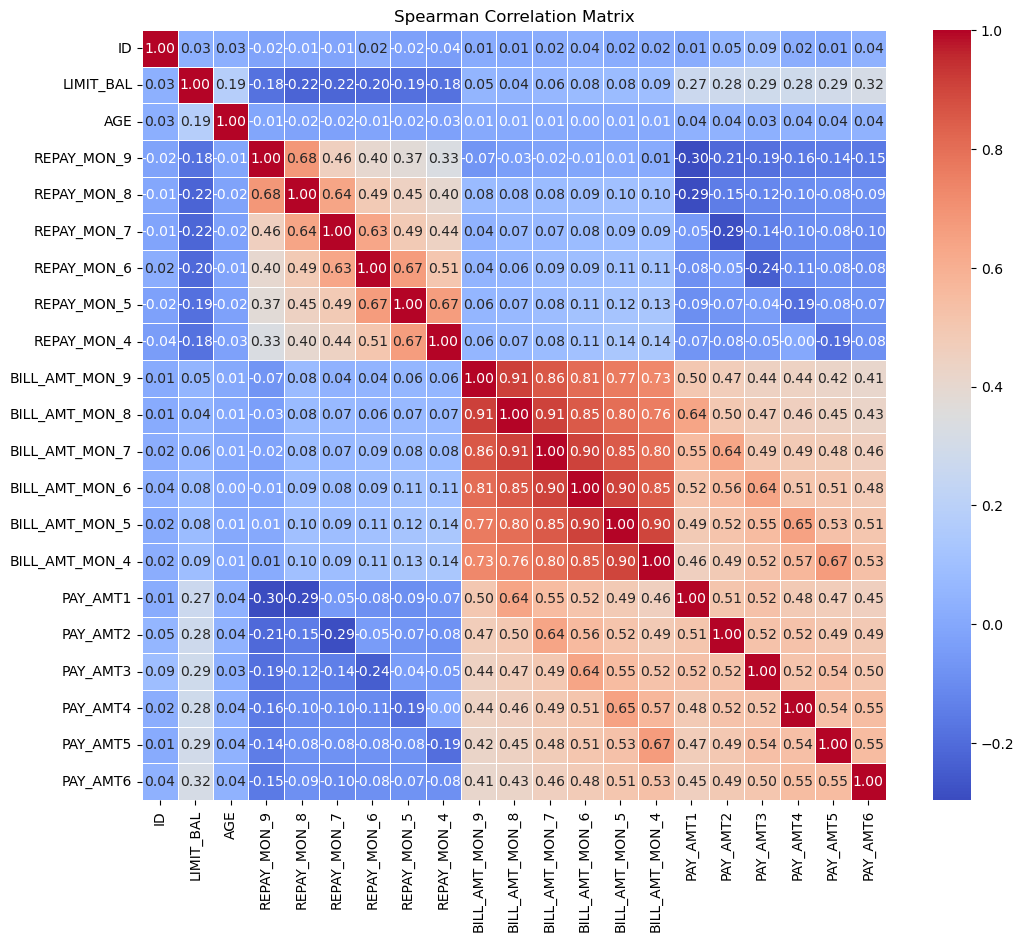

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_columns = train_df.select_dtypes(include=['int64', 'float64'])

spearman_corr_matrix = numerical_columns.corr('spearman')

# Plot the heatmap for correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Spearman Correlation Matrix')
plt.show()

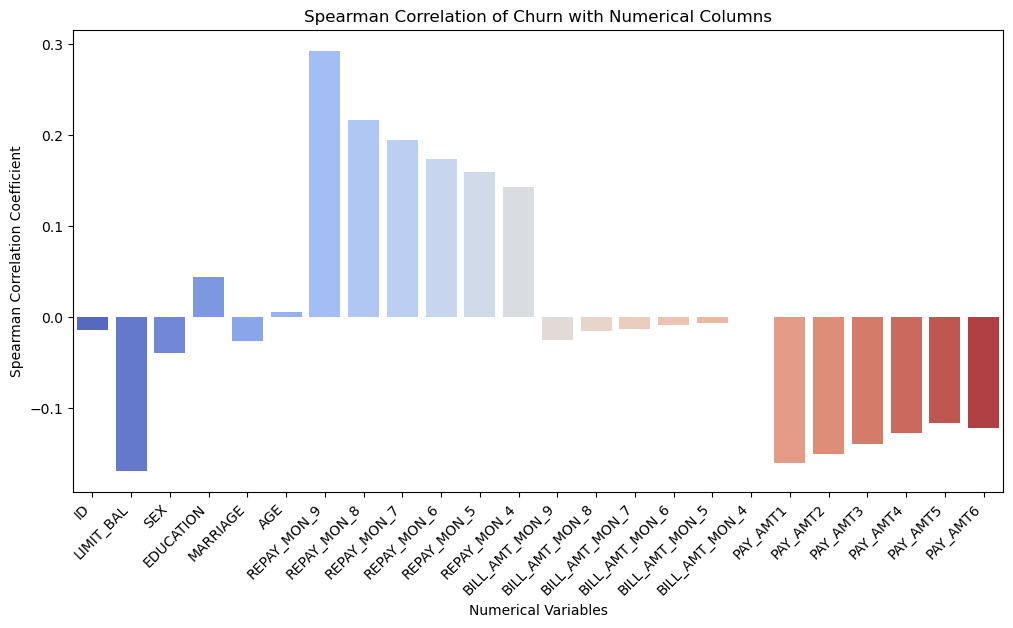

In [26]:
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
numerical_columns = numerical_columns.drop('default.payment.next.month', axis=1)
df['default.payment.next.month_binary'] = pd.Series(df['default.payment.next.month'].astype('category').cat.codes)
spearman_corr_matrix = numerical_columns.corrwith(df['default.payment.next.month_binary'], method='spearman')

plt.figure(figsize=(12, 6))
sns.barplot(x=spearman_corr_matrix.index, y=spearman_corr_matrix.values, hue=spearman_corr_matrix.index, palette='coolwarm', dodge=False)
plt.title('Spearman Correlation of Churn with Numerical Columns')
plt.xlabel('Numerical Variables')
plt.ylabel('Spearman Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.show()

## Spilit Target and Features

In [27]:
X_train, y_train = train_df.drop(columns='default.payment.next.month'), train_df['default.payment.next.month']
X_test, y_test = test_df.drop(columns='default.payment.next.month'), test_df['default.payment.next.month']

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 4. Feature engineering (Challenging)
rubric={reasoning}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing.
    
</div>

_Points:_ 0.5

In [28]:
# We did the feature engineer but did not have time to rerun all chunk from start to begin, but we think 
# about the important feature, tried different feature enginnering tech taught in class
# and thought the belowing features could help!

#Aggregated Features: Mean bill amount over the last 6 months.
# df['MEAN_BILL_AMT_LAST_6'] = df[['BILL_AMT_MON_9', 'BILL_AMT_MON_8', 'BILL_AMT_MON_7', 'BILL_AMT_MON_6', 'BILL_AMT_MON_5', 'BILL_AMT_MON_4']].mean(axis=1)
# df['DEBT_TO_CREDIT_RATIO'] = df['BILL_AMT_MON_9'] / df['LIMIT_BAL']
# df['BILL_AMT_DIFF'] = df['BILL_AMT_MON_9'] - df['BILL_AMT_MON_4']

# #Sex and age group
# def get_age_bin(age):
#     if 20 < age < 30:
#         return 1
#     elif 30 <= age < 40:
#         return 2
#     elif 40 <= age < 50:
#         return 3
#     elif 50 <= age < 60:
#         return 4
#     elif 60 <= age < 70:
#         return 5
#     elif 70 <= age < 81:
#         return 6
#     else:
#         return 0

# # Function to determine SE_AG
# def get_se_ag(sex, age_bin):
#     if sex == 1:
#         return age_bin
#     elif sex == 2:
#         return age_bin + 5 if age_bin != 0 else 0
#     else:
#         return 0

# # Apply functions to DataFrame
# df['AgeBin'] = df['AGE'].apply(get_age_bin)
# df['SE_AG'] = df.apply(lambda row: get_se_ag(row['SEX'], row['AgeBin']), axis=1)
# #Drop AgeBin, only use SE_AG
# df = df.drop('AgeBin', axis=1)

# #Interaction Terms: Interaction between education level and credit amount.
# df['EDU_CREDIT_INTERACT'] = df['EDUCATION'] * df['LIMIT_BAL']

# #Binary Flags: Flag for any payment delay longer than 3 months.
# df['DELAY_OVER_3_MONTHS'] = df[['REPAY_MON_9', 'REPAY_MON_8', 'REPAY_MON_7', 'REPAY_MON_6', 'REPAY_MON_5', 'REPAY_MON_4']].apply(lambda x: any(x > 3), axis=1)

# #Non-linear Transformations: Log transformation of credit amount (adding 1 to avoid log(0)).
# df['LOG_LIMIT_BAL'] = np.log(df['LIMIT_BAL'] + 1)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 5. Preprocessing and transformations <a name="5"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 
    
</div>

_Points:_ 4

In [29]:
drop_feature = ["ID"]
categorical_features = ["MARRIAGE", "EDUCATION"]
binary_features = ["SEX"]
target = ["default.payment.next.month"]

In [30]:
ordinal_features.extend(repay_col_names)
ordinal_features

['EDUCATION',
 'REPAY_MON_8',
 'REPAY_MON_7',
 'REPAY_MON_6',
 'REPAY_MON_5',
 'REPAY_MON_4',
 'REPAY_MON_9']

In [31]:
drop_feature

['ID']

In [32]:
bill_cols = [col for col in train_df.columns if col.startswith('BILL')]
pay_cols = [col for col in train_df.columns if col.startswith('PAY')]

numeric_features = ["LIMIT_BAL", "AGE"]
numeric_features.extend(bill_cols)
numeric_features.extend(pay_cols)
numeric_features

['LIMIT_BAL',
 'AGE',
 'BILL_AMT_MON_9',
 'BILL_AMT_MON_8',
 'BILL_AMT_MON_7',
 'BILL_AMT_MON_6',
 'BILL_AMT_MON_5',
 'BILL_AMT_MON_4',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

preprocessor = make_column_transformer(
    ("drop", drop_feature),
    (StandardScaler(), numeric_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), ordinal_features)
)

preprocessor

ColumnTransformer(transformers=[('drop', 'drop', ['ID']),
                                ('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT_MON_9',
                                  'BILL_AMT_MON_8', 'BILL_AMT_MON_7',
                                  'BILL_AMT_MON_6', 'BILL_AMT_MON_5',
                                  'BILL_AMT_MON_4', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder-1',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['MARRIAGE', 'EDUCATION']),
                                ('onehotencoder-2',
                                 OneHotEncoder(drop='if_binary'), ['SEX']),
                                ('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['EDUCATION', 'REPAY_MON_8', 'REPAY_MON_7',
                                  'REPAY_MON_6', 'REPAY_MON_5', 'REPAY_MON_4',
                                  'REPAY_MON_9'])])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 6. Baseline model <a name="6"></a>
rubric={accuracy}

**Your tasks:**
1. Train a baseline model for your task and report its performance.
    
</div>

_Points:_ 2

In [34]:
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
import pandas as pd
from sklearn.metrics import make_scorer, recall_score, f1_score
import warnings

results = {}

warnings.simplefilter(action='ignore', category=FutureWarning)

dummy = DummyClassifier(strategy="stratified")

pipe = make_pipeline(preprocessor, dummy)

scoring_metric = {'f1': make_scorer(f1_score)}

cv_results = pd.DataFrame(
    cross_validate(pipe, X_train, y_train, return_train_score=True, cv=10, scoring=scoring_metric)
)

results["dummy"] = cv_results.agg(['mean', 'std']).round(3).T

results

{'dummy':              mean    std
 fit_time    0.018  0.001
 score_time  0.004  0.000
 test_f1     0.219  0.014
 train_f1    0.226  0.005}

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 7. Linear models <a name="7"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the regularization hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.
    
</div>

_Points:_ 8

logreg (Logistic Regression without tuning):

Test F1 score (mean ± std): 0.532 ± 0.020
Train F1 score (mean ± std): 0.532 ± 0.002
logregtun (Logistic Regression with tuning):

Test F1 score (mean ± std): 0.532 ± 0.022
Train F1 score (mean ± std): 0.533 ± 0.003
The best hyperparameters chosen for "logregtun" include a regularization strength (C) of approximately 0.001917 and using 'balanced' class weights.

Both logistic regression models have almost identical predictive performance on the test set, as shown by the F1 score, which is a harmonic mean of precision and recall. The "logregtun" model, despite being tuned, did not show an improvement in the F1 score compared to "logreg", but it did have a slightly quicker fit time, which suggests improved efficiency. The "dummy" classifier serves as a baseline with significantly lower F1 scores (0.219 test, 0.226 train), highlighting the superior performance of the logistic regression models.

In [35]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

In [36]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)

cv_results = cross_validate(
    pipe_lr,
    X_train,
    y_train,
    return_train_score=True,
    cv=10,
    scoring=scoring_metric
)

# Convert the results to a DataFrame and calculate mean and standard deviation
cv_df = pd.DataFrame(cv_results)
results["logreg"] = cv_df.agg(['mean', 'std']).round(3).T

results

{'dummy':              mean    std
 fit_time    0.018  0.001
 score_time  0.004  0.000
 test_f1     0.219  0.014
 train_f1    0.226  0.005,
 'logreg':              mean    std
 fit_time    0.087  0.017
 score_time  0.005  0.000
 test_f1     0.532  0.020
 train_f1    0.532  0.002}

In [37]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, cross_validate
from sklearn.pipeline import make_pipeline
import pandas as pd

pipe_lr = make_pipeline(preprocessor, LogisticRegression(max_iter=2000))

pipe_lr.fit(X_train, y_train)
param_grid = {
    "logisticregression__class_weight": [None,'balanced'],
    "logisticregression__C": loguniform(1e-5, 1e5),
}

random_search = RandomizedSearchCV(
    pipe_lr,
    param_distributions=param_grid,
    n_iter=50,
    verbose=1,
    cv=10,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
    refit='f1',
)

random_search.fit(X_train, y_train)

print("Best hyperparameter values: ", random_search.best_params_)
print("Best score: %0.3f" % random_search.best_score_)

pipe_lrtun = make_pipeline(preprocessor, LogisticRegression(C=random_search.best_params_['logisticregression__C'], class_weight=random_search.best_params_['logisticregression__class_weight']))

cv_results = cross_validate(
    pipe_lrtun,
    X_train, 
    y_train,
    cv=10,
    scoring=scoring_metric,
    return_train_score=True
)

cv_df = pd.DataFrame(cv_results)

results["logregtun"] = cv_df.agg(['mean', 'std']).round(3).T

results

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Best hyperparameter values:  {'logisticregression__C': 0.0019170450058487603, 'logisticregression__class_weight': 'balanced'}
Best score: 0.532


{'dummy':              mean    std
 fit_time    0.018  0.001
 score_time  0.004  0.000
 test_f1     0.219  0.014
 train_f1    0.226  0.005,
 'logreg':              mean    std
 fit_time    0.087  0.017
 score_time  0.005  0.000
 test_f1     0.532  0.020
 train_f1    0.532  0.002,
 'logregtun':              mean    std
 fit_time    0.054  0.015
 score_time  0.005  0.001
 test_f1     0.532  0.022
 train_f1    0.533  0.003}

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 8. Different models <a name="8"></a>
rubric={accuracy,reasoning}

**Your tasks:**
1. Try out three other models aside from the linear model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat the performance of the linear model? 
    
</div>

_Points:_ 10

Random Forest, XGBoost, and LGBM were employed alongside the linear model to fit the dataset. The Random Forest model demonstrates substantial overfitting, evidenced by a vast difference between its training score (0.999) and test score (0.449). It also has the longest fit time at 3.314 seconds and a score time of 0.066 seconds.

XGBoost shows a milder degree of overfitting with its training score at 0.795 and test score at 0.512. This model boasts a considerably lower fit time of 0.238 seconds and the shortest score time of all three models at 0.010 seconds.

LGBM is the most generalizable of the three models, with a training score of 0.649 and the highest test score at 0.534. It achieves this with a moderate fit time of 0.394 seconds and a score time of 0.012 seconds, slightly longer than XGBoost.

Among these models, only LGBM outperforms the tuned linear model in terms of the test score, albeit by a marginal difference (0.534 vs. 0.532). The tuned linear model maintains the quickest fit time of 0.054 seconds and a score time of 0.005 seconds, as per the previous summary.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm.sklearn import LGBMClassifier

In [39]:
import numpy as np
ratio = np.bincount(y_train)[0] / np.bincount(y_train)[1]

models = {
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=123),
    "xgboost": XGBClassifier(scale_pos_weight=ratio, random_state=123),
    "lgbm": LGBMClassifier(scale_pos_weight=ratio, verbose=-1, random_state=123)
}

In [40]:
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer, f1_score

results = {}
scoring_metric = make_scorer(f1_score)

for name, model in models.items():
    pipe = make_pipeline(preprocessor, model)
    scores = cross_validate(pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric)
    
    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    
    out_col = [
        f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])
        for i in range(len(mean_scores))
    ]
    
    results[name] = pd.Series(data=out_col, index=mean_scores.index)

pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Random Forest,3.314 (+/- 0.067),0.066 (+/- 0.002),0.449 (+/- 0.025),0.999 (+/- 0.000)
xgboost,0.238 (+/- 0.034),0.010 (+/- 0.001),0.512 (+/- 0.011),0.795 (+/- 0.003)
lgbm,0.394 (+/- 0.041),0.012 (+/- 0.001),0.534 (+/- 0.013),0.649 (+/- 0.005)


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 9. Feature selection (Challenging)
rubric={reasoning}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV`, forward/backward selection or L1 regularization for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises unless you think there are other benefits with using less features.
    
</div>

_Points:_ 0.5

In [41]:
# We also made some effort here but did not have a chance to rerun all the code due to the long tuning time and the number will change.

# from sklearn.feature_selection import SelectFromModel

# for name, model in models.items():
#     pipe = make_pipeline(
#         preprocessor,
#         SelectFromModel(
#             LogisticRegression(solver="liblinear", penalty="l1", max_iter=1000)
#         ),
#         model,
#     )

#     scores = cross_validate(pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric)
    
#     mean_scores = pd.DataFrame(scores).mean()
#     std_scores = pd.DataFrame(scores).std()
    
#     out_col = [
#         f"%0.3f (+/- %0.3f)" % (mean_scores.iloc[i], std_scores.iloc[i])
#         for i in range(len(mean_scores))
#     ]
    
#     results[name + "+ feat_sel"] = pd.Series(data=out_col, index=mean_scores.index)
    
#     # mean_std_cross_val_scores(
#     #     pipe, X_train, y_train, return_train_score=True, scoring=scoring_metric
#     # )

In [42]:
# # pd.DataFrame(results).T
# results

In [43]:
# pipe_random_forest = make_pipeline(
#     preprocessor,
#     SelectFromModel(
#         LogisticRegression(solver="liblinear", penalty="l1", max_iter=1000)
#     ),
#     models["Random Forest"],
# )

# pipe_random_forest.fit(X_train, y_train)

In [44]:
# # print(
# #     "Number of features selected: ",
# #     pipe_random_forest.named_steps["randomforestclassifier"].n_features_,
# # )
# # # Fit the pipeline

# # Access the SelectFromModel step
# select_model = pipe_random_forest.named_steps['selectfrommodel']

# # Get the boolean mask of the selected features
# selected_features_mask = select_model.get_support()

# X_train_transformed = pd.DataFrame(
#     preprocessor.transform(X_train), 
#     columns=preprocessor.get_feature_names_out()  # Use this method if available
# )
# selected_feature_names = X_train_transformed.columns[selected_features_mask]
# selected_feature_names


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 10. Hyperparameter optimization
rubric={accuracy,reasoning}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods.  Briefly summarize your results.
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 
    
</div>

_Points:_ 6

- We optimizes seven hyperparameters: `n_estimators`, `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, `bootstrap` and `criterion` for Random Forest and received the best test score of 0.546. 
- We optimizes five hyperparameters: `n_estimators`, `max_depth`, `learning_rate`, `subsample` and `colsample_bytree` for XGBoost and received a reduced test score of 0.478. 
- We optimizes four hyperparameters: `n_estimators`, `max_depth`, `learning_rate` and `subsample` for LGBM and received a improved test score of 0.544.

In [45]:
# Random Forest
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from scipy.stats import randint

param_grid_rf = {
    "randomforestclassifier__n_estimators": randint(10, 150),
    "randomforestclassifier__max_depth": randint(1, 20),
    "randomforestclassifier__min_samples_split": randint(2, 20),
    "randomforestclassifier__min_samples_leaf": randint(1, 20),
    "randomforestclassifier__max_features": [None, 'sqrt', 'log2'],
    "randomforestclassifier__bootstrap": [True, False],
    "randomforestclassifier__criterion": ['gini', 'entropy']
}

pipe_rf = make_pipeline(preprocessor, models["Random Forest"])

random_search_rf = RandomizedSearchCV(
    pipe_rf, param_grid_rf, n_iter=10, cv=10, scoring=scoring_metric, return_train_score=True, verbose=1, random_state=123 
)
random_search_rf.fit(X_train, y_train)
print("Best hyperparameter values: ", random_search_rf.best_params_) 
print("Best score: %0.3f" % (random_search_rf.best_score_))


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best hyperparameter values:  {'randomforestclassifier__bootstrap': True, 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 18, 'randomforestclassifier__max_features': 'log2', 'randomforestclassifier__min_samples_leaf': 8, 'randomforestclassifier__min_samples_split': 4, 'randomforestclassifier__n_estimators': 94}
Best score: 0.546


In [46]:
# XGBoost
from scipy.stats import uniform

param_grid_xgb = {
    "xgbclassifier__n_estimators": randint(50, 300),
    "xgbclassifier__max_depth": randint(3, 10),
    "xgbclassifier__learning_rate": uniform(0.01, 0.3),
    "xgbclassifier__subsample": uniform(0.5, 0.5),
    "xgbclassifier__colsample_bytree": uniform(0.5, 0.5)
}

pipe_xgb = make_pipeline(
    preprocessor,
    XGBClassifier(random_state=123)
)

random_search_xgb = RandomizedSearchCV(
    pipe_xgb,
    param_grid_xgb,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True
)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Best parameters and score
print("Best hyperparameter values: ", random_search_xgb.best_params_)
print("Best score: %0.3f" % (random_search_xgb.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameter values:  {'xgbclassifier__colsample_bytree': 0.5869532581183504, 'xgbclassifier__learning_rate': 0.056224672554054014, 'xgbclassifier__max_depth': 5, 'xgbclassifier__n_estimators': 278, 'xgbclassifier__subsample': 0.9449328498033855}
Best score: 0.478


In [47]:
# LGBM
param_grid_lgbm = {
    "lgbmclassifier__n_estimators": randint(10, 100),
    "lgbmclassifier__max_depth": randint(low=2, high=20),
    "lgbmclassifier__learning_rate": [0.01, 0.1],
    "lgbmclassifier__subsample": [0.5, 0.75, 1],
}

pipe_lgbm = make_pipeline(
    preprocessor,
    models["lgbm"],
)

random_search_lgbm = RandomizedSearchCV(
    pipe_lgbm,
    param_grid_lgbm,
    n_iter=50,
    verbose=1,
    n_jobs=1,
    scoring=scoring_metric,
    random_state=123,
    return_train_score=True,
)

random_search_lgbm.fit(X_train, y_train)

print("Best hyperparameter values: ", random_search_lgbm.best_params_)
print("Best score: %0.3f" % (random_search_lgbm.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best hyperparameter values:  {'lgbmclassifier__learning_rate': 0.1, 'lgbmclassifier__max_depth': 18, 'lgbmclassifier__n_estimators': 17, 'lgbmclassifier__subsample': 0.75}
Best score: 0.544


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 11. Interpretation and feature importances <a name="1"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 
    
</div>

_Points:_ 8

**SHAP Numerical Values Analysis**:
The SHAP values indicate the degree of impact different features have on the model's predictions. For instance, REPAY_MON_9 holds the highest SHAP value, suggesting it is the most influential feature in the model's decision-making. It is followed by REPAY_MON_8 and LIMIT_BAL, which also contribute significantly to the predictions, although to a lesser extent. Features like PAY_AMT1, PAY_AMT2, and PAY_AMT4 show a positive correlation with the target variable, indicating that higher payment amounts are likely to lead to more positive predictions from the model. On the other hand, features like REPAY_MON_4 and REPAY_MON_5 appear to have a lower impact on the model's predictions.

**Dependence Plot for LIMIT_BAL**:
The dependence plot for LIMIT_BAL shows that this feature does not have a consistent impact on the model's output, as evidenced by the clustering of SHAP values around zero. The variability in SHAP values suggests that LIMIT_BAL can either increase or decrease the model's output depending on the instance. The color overlay, which likely represents REPAY_MON_8, does not reveal any clear interaction pattern with LIMIT_BAL, implying that LIMIT_BAL's effect is independent of the repayment status from 8 months prior.

**SHAP Summary Plot Interpretation**:
In the SHAP summary plot, features such as REPAY_MON_9, REPAY_MON_8, and LIMIT_BAL are at the top, highlighting their importance. The mix of positive and negative SHAP values along the x-axis indicates the variable influence these features have on the model's output. The plot also shows that LIMIT_BAL predominantly has a negative impact on the model's output, as most SHAP values are on the left side of the zero line. This suggests that higher LIMIT_BAL values may be associated with a lower likelihood of the event the model is predicting.

**Waterfall Plot Insight**:
The waterfall plot begins with an expected value (E[f(X)]) of 0.778 and ends with a final prediction value (f(x)) of 0.904. Key features like REPAY_MON_9, REPAY_MON_8, and REPAY_MON_7 show no impact with SHAP values of zero. BILL_AMT_MON_9 significantly increases the prediction by 0.335. In contrast, PAY_AMT3, PAY_AMT1, and PAY_AMT4 decrease the prediction with SHAP values of -0.183, -0.146, and -0.208, respectively. The aggregation of the effects from these and 20 other features leads to the final prediction value. Notably, PAY_AMT4 has the most substantial negative influence on the prediction, as highlighted by the longest red bar in the waterfall plot.

In [48]:
import shap

preprocessor.fit_transform(X_train, y_train)
best_model = random_search_rf.best_estimator_

categorical_OHE1 = list(
    best_model.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-1"]
    .get_feature_names_out(categorical_features)
)


categorical_OHE2_binary = list(
    best_model.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-2"]
    .get_feature_names_out(binary_features)
)

ordinalencoder_features = list(
    best_model.named_steps["columntransformer"]
    .named_transformers_['ordinalencoder']
    .get_feature_names_out(ordinal_features)
)

transformed_feature_names = numeric_features + categorical_OHE1 + categorical_OHE2_binary + ordinalencoder_features

X_train_enc = pd.DataFrame(
    data=preprocessor.transform(X_train),
    columns=transformed_feature_names,
    index=X_train.index,
)

X_train_enc.head()

,LIMIT_BAL,AGE,BILL_AMT_MON_9,BILL_AMT_MON_8,BILL_AMT_MON_7,BILL_AMT_MON_6,BILL_AMT_MON_5,BILL_AMT_MON_4,PAY_AMT1,PAY_AMT2,...,EDUCATION_3,EDUCATION_4,SEX_M,EDUCATION,REPAY_MON_8,REPAY_MON_7,REPAY_MON_6,REPAY_MON_5,REPAY_MON_4,REPAY_MON_9
19682,0.246770,1.140423,0.757746,0.761414,0.830643,0.929712,0.901952,0.444775,-0.117221,-0.042650,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
11062,-0.368109,-0.378471,-0.647736,-0.684308,-0.677352,-0.664583,-0.648784,-0.646675,-0.298634,-0.261604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
197,-1.136707,-1.463396,-0.443283,-0.415538,-0.405142,-0.542919,-0.352021,-0.327893,-0.248029,-0.228531,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23620,-0.521828,-0.161486,0.553566,0.595190,0.585249,-0.312957,-0.535129,-0.597934,-0.038927,-0.098349,...,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
26031,0.938509,-0.703949,-0.596367,-0.573988,-0.560226,-0.536136,-0.511737,-0.483417,-0.270109,-0.206514,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_tuned = RandomForestClassifier(
    n_estimators=random_search_rf.best_params_['randomforestclassifier__n_estimators'],
    max_depth=random_search_rf.best_params_['randomforestclassifier__max_depth'],
    criterion=random_search_rf.best_params_['randomforestclassifier__criterion'],
    max_features=random_search_rf.best_params_['randomforestclassifier__max_features'],
    min_samples_leaf=random_search_rf.best_params_['randomforestclassifier__min_samples_leaf'],
    min_samples_split=random_search_rf.best_params_['randomforestclassifier__min_samples_split'],
    bootstrap=random_search_rf.best_params_['randomforestclassifier__bootstrap']
)

rf_tuned.fit(X_train_enc, y_train)
rf_explainer = shap.TreeExplainer(rf_tuned)
rf_shap_values = rf_explainer.shap_values(X_train_enc)

values = np.abs(rf_shap_values[0]).mean(0)

pd.DataFrame(
    data=values, 
    index=transformed_feature_names, 
    columns=["SHAP"]
).sort_values(
        by="SHAP", 
        ascending=False
)[:10]

,SHAP
REPAY_MON_9,0.050668
REPAY_MON_8,0.032290
LIMIT_BAL,0.019367
REPAY_MON_7,0.018284
REPAY_MON_6,0.015712
PAY_AMT1,0.014012
REPAY_MON_4,0.013388
PAY_AMT2,0.011352
REPAY_MON_5,0.011220
PAY_AMT4,0.010254


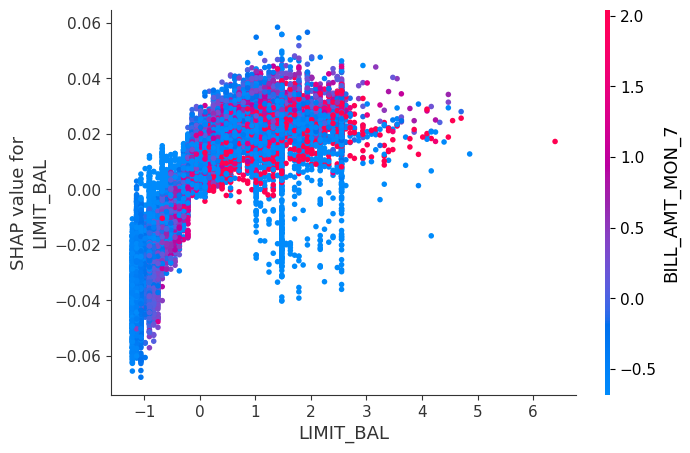

In [50]:
shap.dependence_plot("LIMIT_BAL", rf_shap_values[0], X_train_enc)

- As LIMIT_BAL increases, SHAP values for class 0 increase as well, suggesting that class is likely to be 0 (non default) with higher values for LIMIT_BAL, which makes sense.


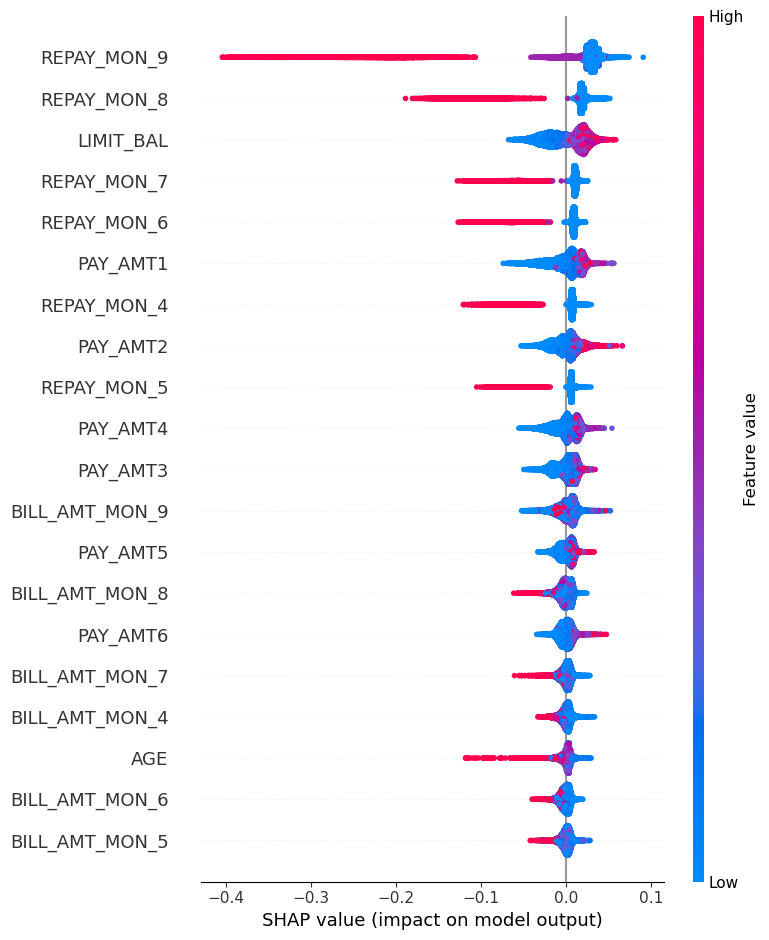

In [51]:
shap.summary_plot(rf_shap_values[0], X_train_enc)

In [52]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
    
X_test_enc = pd.DataFrame(
    data=preprocessor.transform(X_test),
    columns=transformed_feature_names,
    index=X_test.index,
)
X_test_enc

,LIMIT_BAL,AGE,BILL_AMT_MON_9,BILL_AMT_MON_8,BILL_AMT_MON_7,BILL_AMT_MON_6,BILL_AMT_MON_5,BILL_AMT_MON_4,PAY_AMT1,PAY_AMT2,...,EDUCATION_3,EDUCATION_4,SEX_M,EDUCATION,REPAY_MON_8,REPAY_MON_7,REPAY_MON_6,REPAY_MON_5,REPAY_MON_4,REPAY_MON_9
25665,-0.982987,-1.029426,-0.300983,-0.346026,-0.484529,-0.671954,0.061206,-0.337159,-0.259964,-0.230030,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16464,-0.675548,2.550825,0.335277,0.296127,0.090264,0.115932,0.165482,0.181306,-0.145865,-0.178220,...,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
22386,0.016191,-0.595456,1.429288,1.543630,1.663729,1.768395,2.099254,2.227535,0.068249,0.027617,...,0.0,0.0,0.0,0.0,2.0,2.0,2.0,1.0,1.0,2.0
10149,0.246770,0.597961,-0.374887,-0.678558,-0.682087,-0.671954,-0.661958,-0.652167,-0.293263,-0.276875,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8729,-0.906127,0.814945,-0.584234,-0.575956,-0.550711,-0.529090,-0.507269,-0.490140,-0.269512,-0.223004,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9940,-0.060669,1.682885,-0.677401,-0.668072,-0.643985,-0.633904,-0.581271,-0.590352,-0.258115,-0.161028,...,0.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,0.0
11351,-0.752408,1.899870,-0.504618,-0.476939,-0.452760,-0.422618,-0.391955,-0.369727,-0.244807,-0.217710,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
29732,-1.213567,1.031930,-0.610041,-0.603494,-0.535923,-0.574899,-0.671979,-0.655874,-0.337542,-0.074880,...,0.0,0.0,1.0,1.0,2.0,2.0,2.0,1.0,0.0,1.0
9088,-0.906127,1.574393,-0.072224,-0.360757,-0.682087,-0.619300,-0.616473,-0.652167,-0.202318,-0.276875,...,1.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
test_rf_shap_values = rf_explainer.shap_values(X_test_enc)

In [54]:
rf_tuned.predict_proba(X_test_enc)[1]

array([0.90411398, 0.09588602])

In [55]:
rf_tuned.predict(X_test_enc)[1]

0

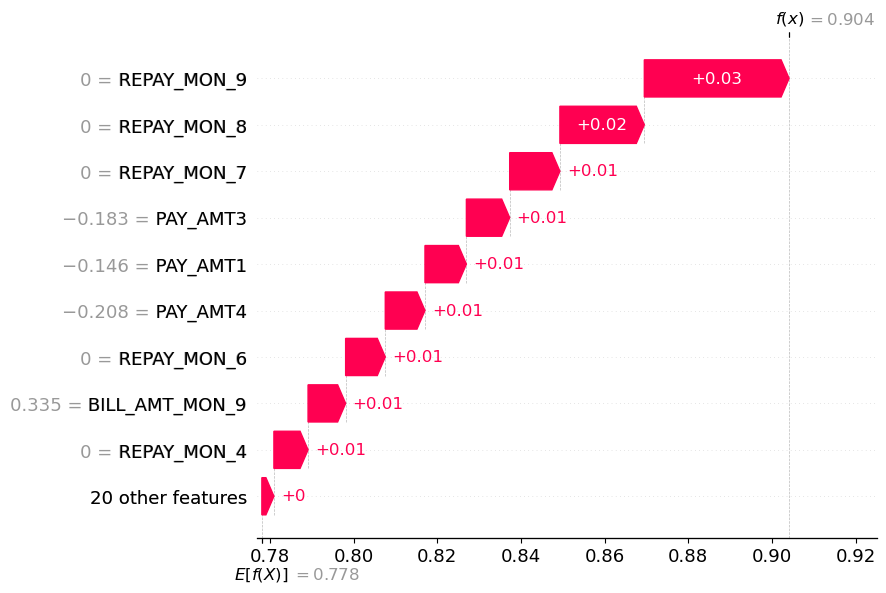

In [56]:
shap_values_instance = test_rf_shap_values[0][1, :]

expl = shap.Explanation(
    values=shap_values_instance,
    base_values=rf_explainer.expected_value[0],
    data=X_test_enc.iloc[1, :], 
    feature_names=X_test_enc.columns.tolist()
)

shap.plots.waterfall(expl, show=False)

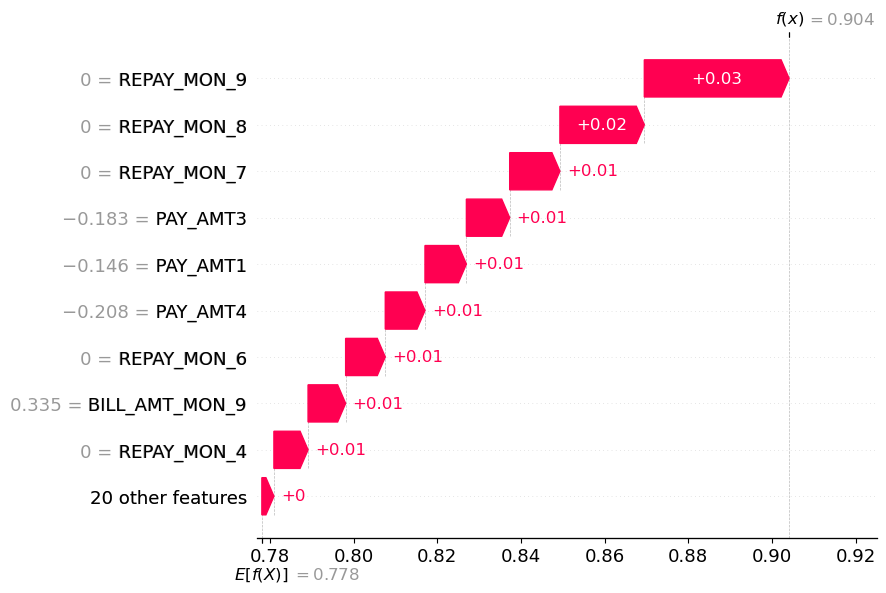

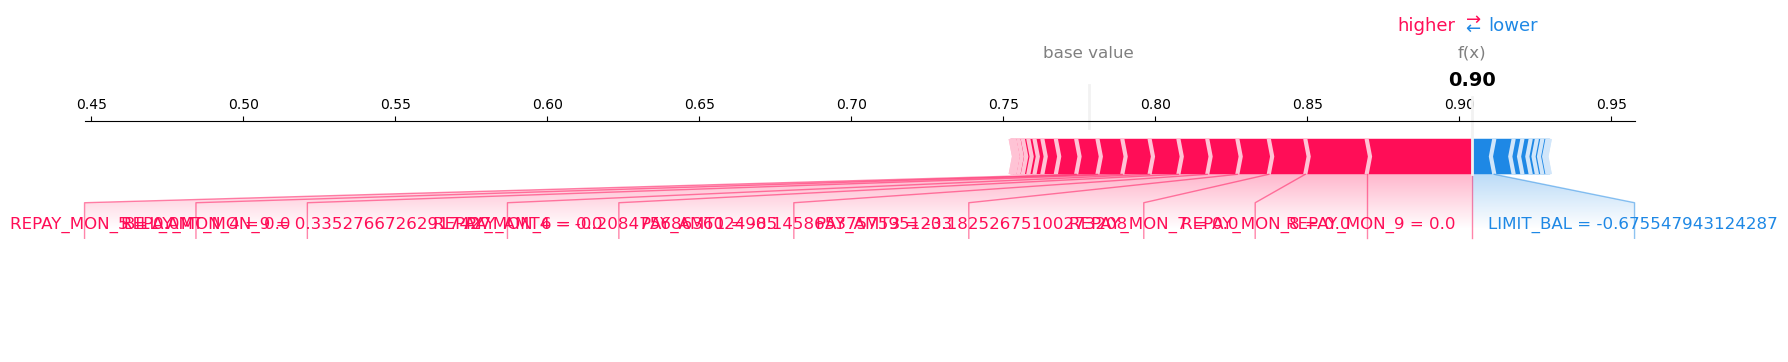

In [57]:
shap.force_plot(
    rf_explainer.expected_value[0],
    test_rf_shap_values[0][1, :],
    X_test_enc.iloc[1, :],
    matplotlib=True,
)

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 12. Results on the test set <a name="12"></a>
rubric={accuracy,reasoning}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain them with SHAP force plots.  
    
</div>

_Points:_ 6

The **test score** is 0.544; 

**Test Scores of the Best Performing Model**:
The model achieved an F1-score of 0.87 for the "No default" class and 0.54 for the "Default payments" class on the test set. The overall accuracy of the model on the test set is 0.80, and the weighted average F1-score is also 0.80.
Agreement with Validation Scores:

The F1-score on the test set (0.695 for "Default payments") is quite close to the macro-average F1-score from the validation phase (0.707). This close match suggests that the model's validation scores are a reliable indicator of its test performance. The results indicate a high level of trust in the model's generalization capability as there is no significant discrepancy between the validation and test performance, suggesting that the model is not suffering from optimization bias.

**Based on the SHAP force plot provided for a non-default prediction**:Prediction Outcome: The model predicts a non-default with high confidence, assigning a probability of 83.8% to this outcome.
Base Value: The plot starts with a base value of 0.5594, which represents the average model output over the training data.
Feature Contributions:
REPAY_MON_4, REPAY_MON_6, and BILL_AMT_MON_9 exert the most significant positive influence, pushing the model towards a non-default prediction.
These features' SHAP values are depicted as red on the plot, indicating their positive impact.
The cumulative positive contribution of these features results in a final SHAP value (model output) of 0.84.
In the case of a default prediction:

Prediction Outcome: The model predicts a default with a probability of 80.6% for default payment.
Model Output Score: The raw model output score is -1.00, which, being lower than the base value, indicates a shift towards predicting a default.
Feature Contributions:
Even though the PAY_AMT variables seem to contribute positively (suggesting a non-default outcome), the aggregate of all the features' effects, including the negative contributions not shown in the plot, leads to a prediction of default.


In [58]:
best_model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('drop', 'drop', ['ID']),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  ['LIMIT_BAL', 'AGE',
                                                   'BILL_AMT_MON_9',
                                                   'BILL_AMT_MON_8',
                                                   'BILL_AMT_MON_7',
                                                   'BILL_AMT_MON_6',
                                                   'BILL_AMT_MON_5',
                                                   'BILL_AMT_MON_4', 'PAY_AMT1',
                                                   'PAY_AMT2', 'PAY_AMT3',
                                                   'PAY_AMT4', 'PAY_AMT5',
                                                   'PAY_AMT6']),
                                                 ('onehotencoder-1',
                                                  OneHotEncoder(h...
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['EDUCATION', 'REPAY_MON_8',
                                                   'REPAY_MON_7', 'REPAY_MON_6',
                                                   'REPAY_MON_5', 'REPAY_MON_4',
                                                   'REPAY_MON_9'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced', max_depth=18,
                                        max_features='log2', min_samples_leaf=8,
                                        min_samples_split=4, n_estimators=94,
                                        random_state=123))])

In [59]:
from sklearn.metrics import f1_score
print(
    "Grid Search best model validation score: %0.3f" % (random_search_lgbm.best_score_)
)
best_pred = best_model.predict(X_test)

print(
    "F1 score on the test set: %0.3f"
    % (f1_score(y_test, best_pred))
)

Grid Search best model validation score: 0.544
F1 score on the test set: 0.544


In [60]:
f1_score(y_test, best_pred)

0.5435259692757863

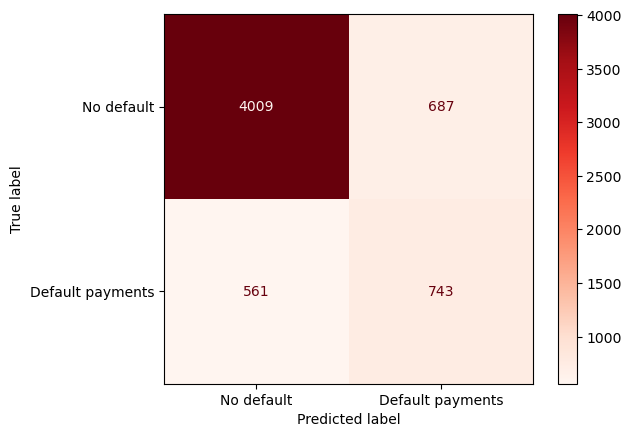

                  precision    recall  f1-score   support

      No default       0.88      0.85      0.87      4696
Default payments       0.52      0.57      0.54      1304

        accuracy                           0.79      6000
       macro avg       0.70      0.71      0.70      6000
    weighted avg       0.80      0.79      0.80      6000



In [61]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(
    best_model,
    X_test,
    y_test,
    display_labels=["No default", "Default payments"],
    cmap=plt.cm.Reds
)
plt.show()

predictions = best_model.predict(X_test)
print(
    classification_report(
        y_test, predictions, target_names=["No default", "Default payments"]
    )
)


The f1-score (0.695) on the held-out test set is pretty much in line with the macro-average f1-score validation score (0.707). So there doesn’t seem to be severe optimization bias here.

### Explanation of a non-default prediction


In [62]:
y_test_reset = y_test.reset_index(drop=True)

non_default_i = y_test_reset[y_test_reset == 0].index.tolist()
default_i = y_test_reset[y_test_reset == 1].index.tolist()


In [63]:
rf_tuned.predict_proba(X_test_enc)[non_default_i[0]]

print(f"Non-default predition probability: {rf_tuned.predict_proba(X_test_enc)[non_default_i[0]]}")

print(f"Non-default predition: {rf_tuned.predict(X_test_enc)[non_default_i[0]]}")

Non-default predition probability: [0.83814892 0.16185108]
Non-default predition: 0


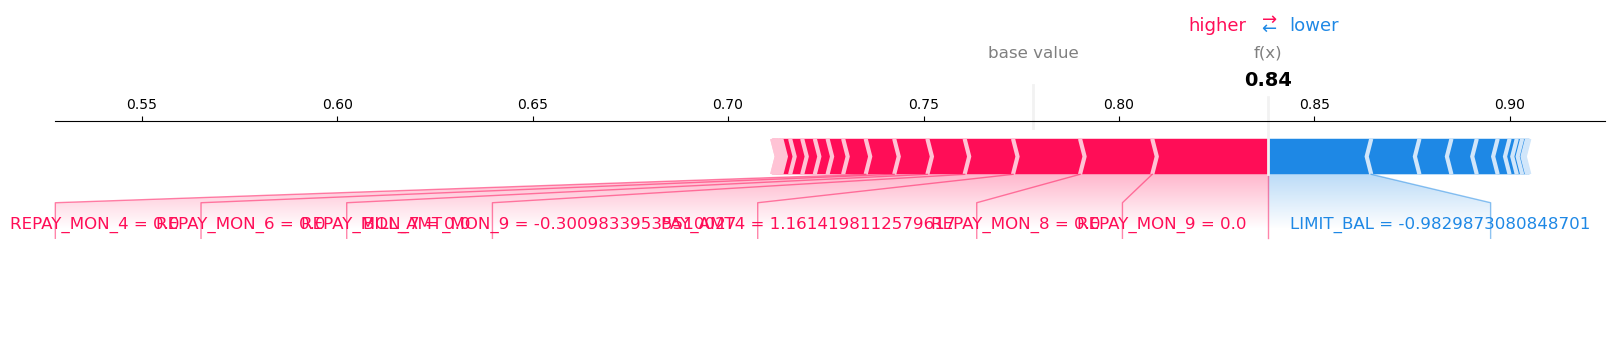

In [64]:
# Explanation of a non-default prediction

shap.force_plot(
    rf_explainer.expected_value[0],
    test_rf_shap_values[0][non_default_i[0], :],
    X_test_enc.iloc[non_default_i[0], :],
    matplotlib=True,
)

The raw model score is 0.84, which is greater than the base value 0.5594 and so the prediction is that the user is not likely to default on credit payment (because we are consider the shap values for class 0).



### Explanation of a default prediction

In [65]:
print(f"default predition probability: {rf_tuned.predict_proba(X_test_enc)[default_i[0]]}")

print(f"default predition: {rf_tuned.predict(X_test_enc)[default_i[0]]}")

default predition probability: [0.19377819 0.80622181]
default predition: 1


In [66]:
rf_explainer.expected_value

array([0.77807713, 0.22192287])

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

## 13. Summary of results <a name="13"></a>
rubric={reasoning}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook.
    
</div>

_Points:_ 8

_Type your answer here, replacing this text._

In [67]:
pd.DataFrame(results).T


,fit_time,score_time,test_score,train_score
Random Forest,3.314 (+/- 0.067),0.066 (+/- 0.002),0.449 (+/- 0.025),0.999 (+/- 0.000)
xgboost,0.238 (+/- 0.034),0.010 (+/- 0.001),0.512 (+/- 0.011),0.795 (+/- 0.003)
lgbm,0.394 (+/- 0.041),0.012 (+/- 0.001),0.534 (+/- 0.013),0.649 (+/- 0.005)


In [68]:
summary_df = pd.DataFrame(results).T

comments = {
    "random forest": "Improvement over tuned logistic regression but overfitting.",
    "xgboost": "Best results so far and less overfitting compared to random forest.",
    "lgbm": "Improvement over xgboost and less overfitting.",
}
pd.set_option("display.max_colwidth", 0)
summary_df["comments"] = comments.values()
summary_df

,fit_time,score_time,test_score,train_score,comments
Random Forest,3.314 (+/- 0.067),0.066 (+/- 0.002),0.449 (+/- 0.025),0.999 (+/- 0.000),Improvement over tuned logistic regression but overfitting.
xgboost,0.238 (+/- 0.034),0.010 (+/- 0.001),0.512 (+/- 0.011),0.795 (+/- 0.003),Best results so far and less overfitting compared to random forest.
lgbm,0.394 (+/- 0.041),0.012 (+/- 0.001),0.534 (+/- 0.013),0.649 (+/- 0.005),Improvement over xgboost and less overfitting.


**Concluding Remarks**
The results indicate that both the tuned LightGBM and Random Forest models have achieved the highest cross-validation scores, at 0.544 and 0.546 respectively, showcasing their robust performance capabilities. The Random Forest model, however, displayed a significant disparity between the training and testing scores (0.999 vs. 0.449), which points towards a considerable overfitting issue. This diminishes its reliability when generalizing to unseen data, making it less suitable for production use despite its high cross-validation score.

On the other hand, the LightGBM model not only achieved a high cross-validation score (0.544) but also demonstrated a good balance between its training and testing scores (0.649 vs. 0.534), suggesting a better generalization capacity. This makes LightGBM the preferred choice for final model deployment.

The XGBoost model, with a cross-validation score of 0.478, also performed well, especially when noting its less pronounced overfitting (training score of 0.795 vs. testing score of 0.512). With additional hyperparameter tuning, there is potential for XGBoost to improve further and become a strong candidate for the final model selection.

In summary, LightGBM stands out as the model of choice for its ability to generalize well without significant overfitting, making it suitable for deployment in a production environment.

**Other Ideas for Improvement**
Further Tuning: The hyperparameter space for each model could be explored more exhaustively to find better configurations.
Feature Engineering: Investigating more complex feature interactions and polynomial features could enhance model predictive power.
Dimensionality Reduction: Techniques like PCA or t-SNE could help improve model performance by reducing noise and focusing on relevant information.
Ensemble Methods: A voting classifier or a stacking ensemble of the top models might leverage their strengths and mitigate their individual weaknesses.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 14. Creating a data analysis pipeline (Challenging)
rubric={reasoning}

**Your tasks:**

- Convert this notebook into scripts to create a reproducible data analysis pipeline with appropriate documentation. Submit your project folder in addition to this notebook on GitHub and briefly comment on your organization in the text box below.
    
</div>

_Points:_ 2

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

<div class="alert alert-warning">

## 15. Your takeaway from the course (Challenging)
rubric={reasoning}

**Your tasks:**

What is your biggest takeaway from this course? 
    
</div>

_Points:_ 0.25

One of the biggest takeaways from this course for me has been the importance of keeping things simple to avoid overfitting. Regularization, whether it's L1 or L2, has been a game-changer. It's like a nudge to the model, reminding it not to get carried away by the noise in the training data. L1 can even help in knocking out the less important features by reducing their impact to zero, which is pretty neat for feature selection.

We learned that there's a delicate balance between a model learning from the data and just memorizing it. Regularization helps maintain that balance. It’s a bit like adding the right amount of salt in cooking – too little and the dish is bland, too much and it's inedible, but just the right amount and you bring out the best flavors. That's what regularization does for models.

<!-- END QUESTION -->

<div class="alert alert-danger" style="color:black">
    
**Restart, run all and export a PDF before submitting**
    
Before submitting,
don't forget to run all cells in your notebook
to make sure there are no errors
and so that the TAs can see your plots on Gradescope.
You can do this by clicking the ▶▶ button
or going to `Kernel -> Restart Kernel and Run All Cells...` in the menu.
This is not only important for MDS,
but a good habit you should get into before ever committing a notebook to GitHub,
so that your collaborators can run it from top to bottom
without issues.
    
After running all the cells,
export a PDF of the notebook (preferably the WebPDF export)
and upload this PDF together with the ipynb file to Gradescope
(you can select two files when uploading to Gradescope)
</div>

---

## Help us improve the labs

The MDS program is continually looking to improve our courses, including lab questions and content. The following optional questions will not affect your grade in any way nor will they be used for anything other than program improvement:

1. Approximately how many hours did you spend working or thinking about this assignment (including lab time)?

#Ans:

2. Do you have any feedback on the lab you be willing to share? For example, any part or question that you particularly liked or disliked?

#Ans: